In [1]:
import numpy as np
import math
import random

In [2]:
# Function to Generate First Population
def initialization(length):
    chromosome = []
    for j in range(length):
        chromosome.append(round(np.random.uniform(0, 1)))
    return chromosome

In [3]:
# Function to calculate real value from binary value
def binaryToReal(chromosome, low, high, pos):
    var = []
    n = 0
    for i in range(len(pos)):
        temp = []
        total = 0
        if i == 0:
            for j in range(0, pos[i]):
                total = total + (int(chromosome[j]) * (2 ** (pos[i] - j - 1)))
            # x = const_min + x' * (const_length / (2^chromosome_length - 1))
            total = round(low[i] + total * ((high[i] - low[i]) / (2 ** pos[i] - 1)), 3)
            temp.append(total)
        else:
            for j in range(0, pos[i]):
                total = total + (int(chromosome[(pos[n] + j)]) * (2 ** (pos[i] - j - 1)))
            # y = const_min + y' * (const_length / (2^chromosome_length - 1))
            total = round(low[i] + total * ((high[i] - low[i]) / (2 ** (pos[i]) - 1)), 3)
            temp.append(total)
        n = i        
        var.append(temp)
    return var

In [4]:
# Function to check if chromosome out of contraint (x + y >= 1)
def constraint(x, y):
    total = x + y
    
    if total < 1:
        return False
    else:
        return True

In [5]:
# Function to calculate fitness
def fitness(x, y):
    f = round(math.cos((x - 1.14) ** 3) - 100000 * (y ** 2 - x) ** 2, 3)
    return f

In [17]:
# Function to find parent using Tournament Selection
def selection(fitness, population):
    size = len(population)
    
    parent_1_a = random.randint(0, size-1)
    parent_1_b = random.randint(0, size-1)
    
    parent_1_a_fitness = fitness[parent_1_a]
    parent_1_b_fitness = fitness[parent_1_b]
    
    # find winner for parent 1
    if parent_1_a_fitness >= parent_1_b_fitness:
        parent_1_winner = parent_1_a
    else:
        parent_1_winner = parent_1_b
        
    parent_2_a = random.randint(0, size-1)
    parent_2_b = random.randint(0, size-1)
    
    parent_2_a_fitness = fitness[parent_2_a]
    parent_2_b_fitness = fitness[parent_2_b]
    
    # find winner for parent 2
    if parent_2_a_fitness >= parent_2_b_fitness:
        parent_2_winner = parent_2_a
    else:
        parent_2_winner = parent_2_b
    
    # make sure parent cannot be the same
    if parent_1_winner == parent_2_winner:
        return selection(fitness, population)
    else:
        return population[parent_1_winner], population[parent_2_winner] 

In [7]:
# Function to crossover the parents using Uniform Crossover
def crossover(parent_1, parent_2):
    mask = []
    offspring_1 = []
    offspring_2 = []
    
    rand = np.random.uniform(0, 1)
    
    # check if crossover rate is larger than random value than do crossover
    if rand < crossover_rate: 
        # create mask
        for i in range(length):
            mask.append(round(np.random.uniform(0, 1)))

        # change gene base on mask value
        for i in range(length):
            if mask[i] == 1:
                offspring_1.append(parent_2[i])
                offspring_2.append(parent_1[i])
            elif mask[i] == 0:
                offspring_1.append(parent_1[i])
                offspring_2.append(parent_2[i])

        return [offspring_1, offspring_2]
    else:
        return [parent_1, parent_2]

In [21]:
# Function to mutate the parents using Chromosome-wise Mutation
def mutation(offspring_1, offspring_2):
    rand_1 = np.random.uniform(0, 1)
    rand_2 = np.random.uniform(0, 1)
    
    result_1 = offspring_1
    result_2 = offspring_2
    
    if rand_1 < crossover_rate:
        pos = random.randint(0, length-1)
        offspring_1[pos] = 1 - offspring_1[pos]
        result_1 = offspring_1
    
    if rand_2 < crossover_rate:
        pos = random.randint(0, length-1)
        offspring_2[pos] = 1 - offspring_2[pos]
        result_2 = offspring_2

    return result_1, result_2

In [24]:
# initial parameters
length = 23
length_population = 100
crossover_rate = 0.9
mutation_rate = 0.2
generation = 500

# first population generation
population = []
fitnesses = []
counter_population = 0
while counter_population < length_population:
    chromosome = initialization(length)
    x, y = binaryToReal(chromosome, [0, 0], [2, 3], [11, 12])
    # calculate fitness
    fit = fitness(x[0], y[0]) 
    evals = constraint(x[0], y[0])
    # check if chromosome is inside constraints
    if evals:
        population.append(chromosome)
        fitnesses.append(fit)
        counter_population = counter_population + 1

In [25]:
# next population generation
score = []
for n in range(generation):
    # parent selection
    parent_1, parent_2 = selection(fitnesses, population)
        
    # crossover
    offspring_1, offspring_2 = crossover(parent_1, parent_2)
    
    # mutation
    offspring_1, offspring_2 = mutation(offspring_1, offspring_2)
    x_1, y_1 = binaryToReal(offspring_1, [0, 0], [2, 3], [11, 12])
    fit_1 = fitness(x_1[0], y_1[0])

    x_2, y_2 = binaryToReal(offspring_2, [0, 0], [2, 3], [11, 12])
    fit_2 = fitness(x_2[0], y_2[0])
    
    # replace chromosomes with lowest fitness with higher fitness
    fitnesses.append(fit_1)
    fitnesses.append(fit_2)
    population.append(offspring_1)
    population.append(offspring_2)
    fitnesses, population = zip(*sorted(zip(fitnesses, population), reverse=True))
    
    population = list(population[:len(population) -2])
    fitnesses = list(fitnesses[:len(fitnesses)-2])
    score.append(np.amax(np.array(fitnesses)))
    
best_x, best_y = binaryToReal(population[0], [0, 0], [2, 3], [11, 12])
print("Best solution:")
print("x: %.3f  ||  y: %.3f  => %.3f" % (best_x[0], best_y[0], fitnesses[0]))

Best solution:
x: 0.958  ||  y: 0.979  => 0.981


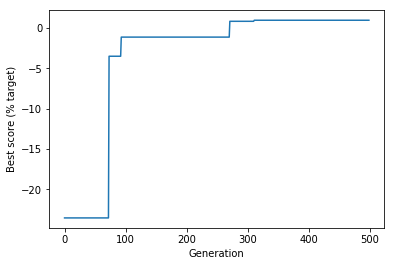

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(score)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()